# Import Libraries

# Suthasinee Pojam 6220422065

In [4]:
!pip install networkx
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
!apt install fonts-thai-tlwg

--2021-12-31 12:58:48--  https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
Resolving awards.opdc.go.th (awards.opdc.go.th)... 164.115.76.22
Connecting to awards.opdc.go.th (awards.opdc.go.th)|164.115.76.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18055 (18K) [text/html]
Saving to: ‘THSarabunNew.ttf’

THSarabunNew.ttf    100%[===================>]  17.63K  --.-KB/s    in 0s      

2021-12-31 12:58:51 (178 MB/s) - ‘THSarabunNew.ttf’ saved [18055/18055]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-tlwg-garuda fonts-tlwg-garuda-ttf fonts-tlwg-kinnari
  fonts-tlwg-kinnari-ttf fonts-tlwg-laksaman fonts-tlwg-laksaman-ttf
  fonts-tlwg-loma fonts-tlwg-loma-ttf fonts-tlwg-mono fonts-tlwg-mono-ttf
  fonts-tlwg-norasi fonts-tlwg-norasi-ttf fonts-tlwg-purisa
  fonts-tlwg-purisa-ttf fonts-tlwg-sawasdee fonts-tlwg-sawasdee-ttf

In [5]:
import numpy as np
import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn  as sns
import numpy as np
from sklearn.metrics import jaccard_score

from scipy.spatial.distance import cosine
from matplotlib.pyplot import figure, text
import networkx as nx

# Set font
font_list = fm.createFontList(['THSarabunChula-Regular.ttf'])
print(font_list)
fm.fontManager.ttflist.extend(font_list)
# fm.fontManager.addfont(font_list)
plt.rcParams['font.family'] = 'TH Sarabun Chula'
plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0

[<Font 'TH Sarabun Chula' (THSarabunChula-Regular.ttf) normal normal regular normal>]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  app.launch_new_instance()


In [6]:
# Find font path
print(matplotlib.matplotlib_fname())
# Find font cache path
print(matplotlib.get_cachedir())

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc
/root/.cache/matplotlib


In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Dataset

In [9]:
df = pd.read_csv('/content/Customer Preference Survey (Responses) - Form Responses 1.csv')
print(df.shape)
df.head()

(47, 42)


,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [10]:
#EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      47 non-null     object
 1   playstation5                   46 non-null     object
 2   เครื่องทำขนมปัง                46 non-null     object
 3   Ergonomic Wrist Rest           46 non-null     object
 4   เครื่องอบผ้า                   46 non-null     object
 5   เครื่องชงกาแฟแคปซูล            46 non-null     object
 6   เก้าอี้ LA-Z-Boy               46 non-null     object
 7   เครื่องให้อาหารสัตว์อัตโนมัติ  46 non-null     object
 8   บัตตาเลี่ยน                    45 non-null     object
 9   แก้วเก็บความเย็น               46 non-null     object
 10  ลู่วิ่งออกกำลังกาย             46 non-null     object
 11  Kindle                         46 non-null     object
 12  เครื่องซักผ้า                  46 non-null     object
 13  Bluetoo

In [11]:
df.isnull().sum()

Timestamp                        0
playstation5                     1
เครื่องทำขนมปัง                  1
Ergonomic Wrist Rest             1
เครื่องอบผ้า                     1
เครื่องชงกาแฟแคปซูล              1
เก้าอี้ LA-Z-Boy                 1
เครื่องให้อาหารสัตว์อัตโนมัติ    1
บัตตาเลี่ยน                      2
แก้วเก็บความเย็น                 1
ลู่วิ่งออกกำลังกาย               1
Kindle                           1
เครื่องซักผ้า                    1
Bluetooth Speaker                1
ห้องน้ำแมวอัตโนมัติ              1
PS5                              1
ทรายแมว                          1
ลำโพง pixel                      1
Logitech Mx Master 3 Mouse       1
ตุ๊กตา ty                        1
น้ำพุแมว                         1
Robot ดูดฝุ่น                    1
Mechanical keyboard              2
Nintendo switch                  2
หนังสือ python                   1
gaming chair                     2
Deskmat                          1
Dew - ไฟโรเซ่                    1
เทียนหอม jo malone  

# Data Cleansing

### Drop Missing Value

In [12]:
obj = df.isnull().sum()
for key,value in obj.iteritems():
    if value >= 1:
        print(key,",",value)

playstation5 , 1
เครื่องทำขนมปัง , 1
Ergonomic Wrist Rest , 1
เครื่องอบผ้า , 1
เครื่องชงกาแฟแคปซูล , 1
เก้าอี้ LA-Z-Boy , 1
เครื่องให้อาหารสัตว์อัตโนมัติ , 1
บัตตาเลี่ยน , 2
แก้วเก็บความเย็น , 1
ลู่วิ่งออกกำลังกาย , 1
Kindle , 1
เครื่องซักผ้า , 1
Bluetooth Speaker , 1
ห้องน้ำแมวอัตโนมัติ , 1
PS5 , 1
ทรายแมว , 1
ลำโพง pixel , 1
Logitech Mx Master 3 Mouse , 1
ตุ๊กตา ty , 1
น้ำพุแมว , 1
Robot ดูดฝุ่น , 1
Mechanical keyboard , 2
Nintendo switch , 2
หนังสือ python , 1
gaming chair , 2
Deskmat , 1
Dew - ไฟโรเซ่ , 1
เทียนหอม jo malone , 1
กระติกน้ำ 2 ลิตร , 2
ที่นอน memory form , 1
พลาสเตอร์บรรเทาปวด ตราเสือ , 1
การ์ดจอ RTX 3080 , 1
ขนมจีนน้ำยาปู , 1
Salmon Sashimi , 1
จักรยานเสือหมอบ , 1
ไฟแต่งห้องมินิมอล , 2
External Harddisk , 1
หม้อทอดไร้น้ํามัน , 2
airpods  , 1
ยาดม , 1
ไฟส่องหน้าไลฟ์สด , 1


In [21]:
df=df.replace(['ไม่เคย','ไม่เคยซือ','ไม่','ไม่เคยซื้อ'],0)
df=df.replace(['เคยซื้อ','เคย'],1)
df['Transaction_id'] = [i for i in range(1,(df.shape[0]+1))]

In [37]:
df[['playstation5','เครื่องทำขนมปัง','Ergonomic Wrist Rest','เครื่องอบผ้า','เครื่องชงกาแฟแคปซูล','เก้าอี้ LA-Z-Boy','เครื่องให้อาหารสัตว์อัตโนมัติ','บัตตาเลี่ยน','แก้วเก็บความเย็น','ลู่วิ่งออกกำลังกาย','Kindle','เครื่องซักผ้า','Bluetooth Speaker','ห้องน้ำแมวอัตโนมัติ','PS5','ทรายแมว','ลำโพง pixel','Logitech Mx Master 3 Mouse','ตุ๊กตา ty','น้ำพุแมว','Robot ดูดฝุ่น','Mechanical keyboard','Nintendo switch','หนังสือ python','gaming chair','Deskmat','Dew - ไฟโรเซ่','เทียนหอม jo malone','กระติกน้ำ 2 ลิตร','ที่นอน memory form','พลาสเตอร์บรรเทาปวด ตราเสือ','การ์ดจอ RTX 3080','ขนมจีนน้ำยาปู','Salmon Sashimi','จักรยานเสือหมอบ','ไฟแต่งห้องมินิมอล','External Harddisk','หม้อทอดไร้น้ํามัน','airpods ','ยาดม','ไฟส่องหน้าไลฟ์สด']]\
=df[['playstation5','เครื่องทำขนมปัง','Ergonomic Wrist Rest','เครื่องอบผ้า','เครื่องชงกาแฟแคปซูล','เก้าอี้ LA-Z-Boy','เครื่องให้อาหารสัตว์อัตโนมัติ','บัตตาเลี่ยน','แก้วเก็บความเย็น','ลู่วิ่งออกกำลังกาย','Kindle','เครื่องซักผ้า','Bluetooth Speaker','ห้องน้ำแมวอัตโนมัติ','PS5','ทรายแมว','ลำโพง pixel','Logitech Mx Master 3 Mouse','ตุ๊กตา ty','น้ำพุแมว','Robot ดูดฝุ่น','Mechanical keyboard','Nintendo switch','หนังสือ python','gaming chair','Deskmat','Dew - ไฟโรเซ่','เทียนหอม jo malone','กระติกน้ำ 2 ลิตร','ที่นอน memory form','พลาสเตอร์บรรเทาปวด ตราเสือ','การ์ดจอ RTX 3080','ขนมจีนน้ำยาปู','Salmon Sashimi','จักรยานเสือหมอบ','ไฟแต่งห้องมินิมอล','External Harddisk','หม้อทอดไร้น้ํามัน','airpods ','ยาดม','ไฟส่องหน้าไลฟ์สด']]\
.fillna( value = df[['playstation5','เครื่องทำขนมปัง','Ergonomic Wrist Rest','เครื่องอบผ้า','เครื่องชงกาแฟแคปซูล','เก้าอี้ LA-Z-Boy','เครื่องให้อาหารสัตว์อัตโนมัติ','บัตตาเลี่ยน','แก้วเก็บความเย็น','ลู่วิ่งออกกำลังกาย','Kindle','เครื่องซักผ้า','Bluetooth Speaker','ห้องน้ำแมวอัตโนมัติ','PS5','ทรายแมว','ลำโพง pixel','Logitech Mx Master 3 Mouse','ตุ๊กตา ty','น้ำพุแมว','Robot ดูดฝุ่น','Mechanical keyboard','Nintendo switch','หนังสือ python','gaming chair','Deskmat','Dew - ไฟโรเซ่','เทียนหอม jo malone','กระติกน้ำ 2 ลิตร','ที่นอน memory form','พลาสเตอร์บรรเทาปวด ตราเสือ','การ์ดจอ RTX 3080','ขนมจีนน้ำยาปู','Salmon Sashimi','จักรยานเสือหมอบ','ไฟแต่งห้องมินิมอล','External Harddisk','หม้อทอดไร้น้ํามัน','airpods ','ยาดม','ไฟส่องหน้าไลฟ์สด']]\
.median())
df.tail()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,Transaction_id
42,10/17/2021 17:46:06,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,43
43,10/17/2021 17:46:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,44
44,10/17/2021 17:46:17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,45
45,10/17/2021 17:46:29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,46
46,10/17/2021 17:46:31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,47


In [38]:
df.iloc[:,2].value_counts()

0.0    44
1.0     3
Name: เครื่องทำขนมปัง, dtype: int64

# Data Preparation

In [40]:
df_data = df.iloc[:,2:-1]
df_data

,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#Visualization

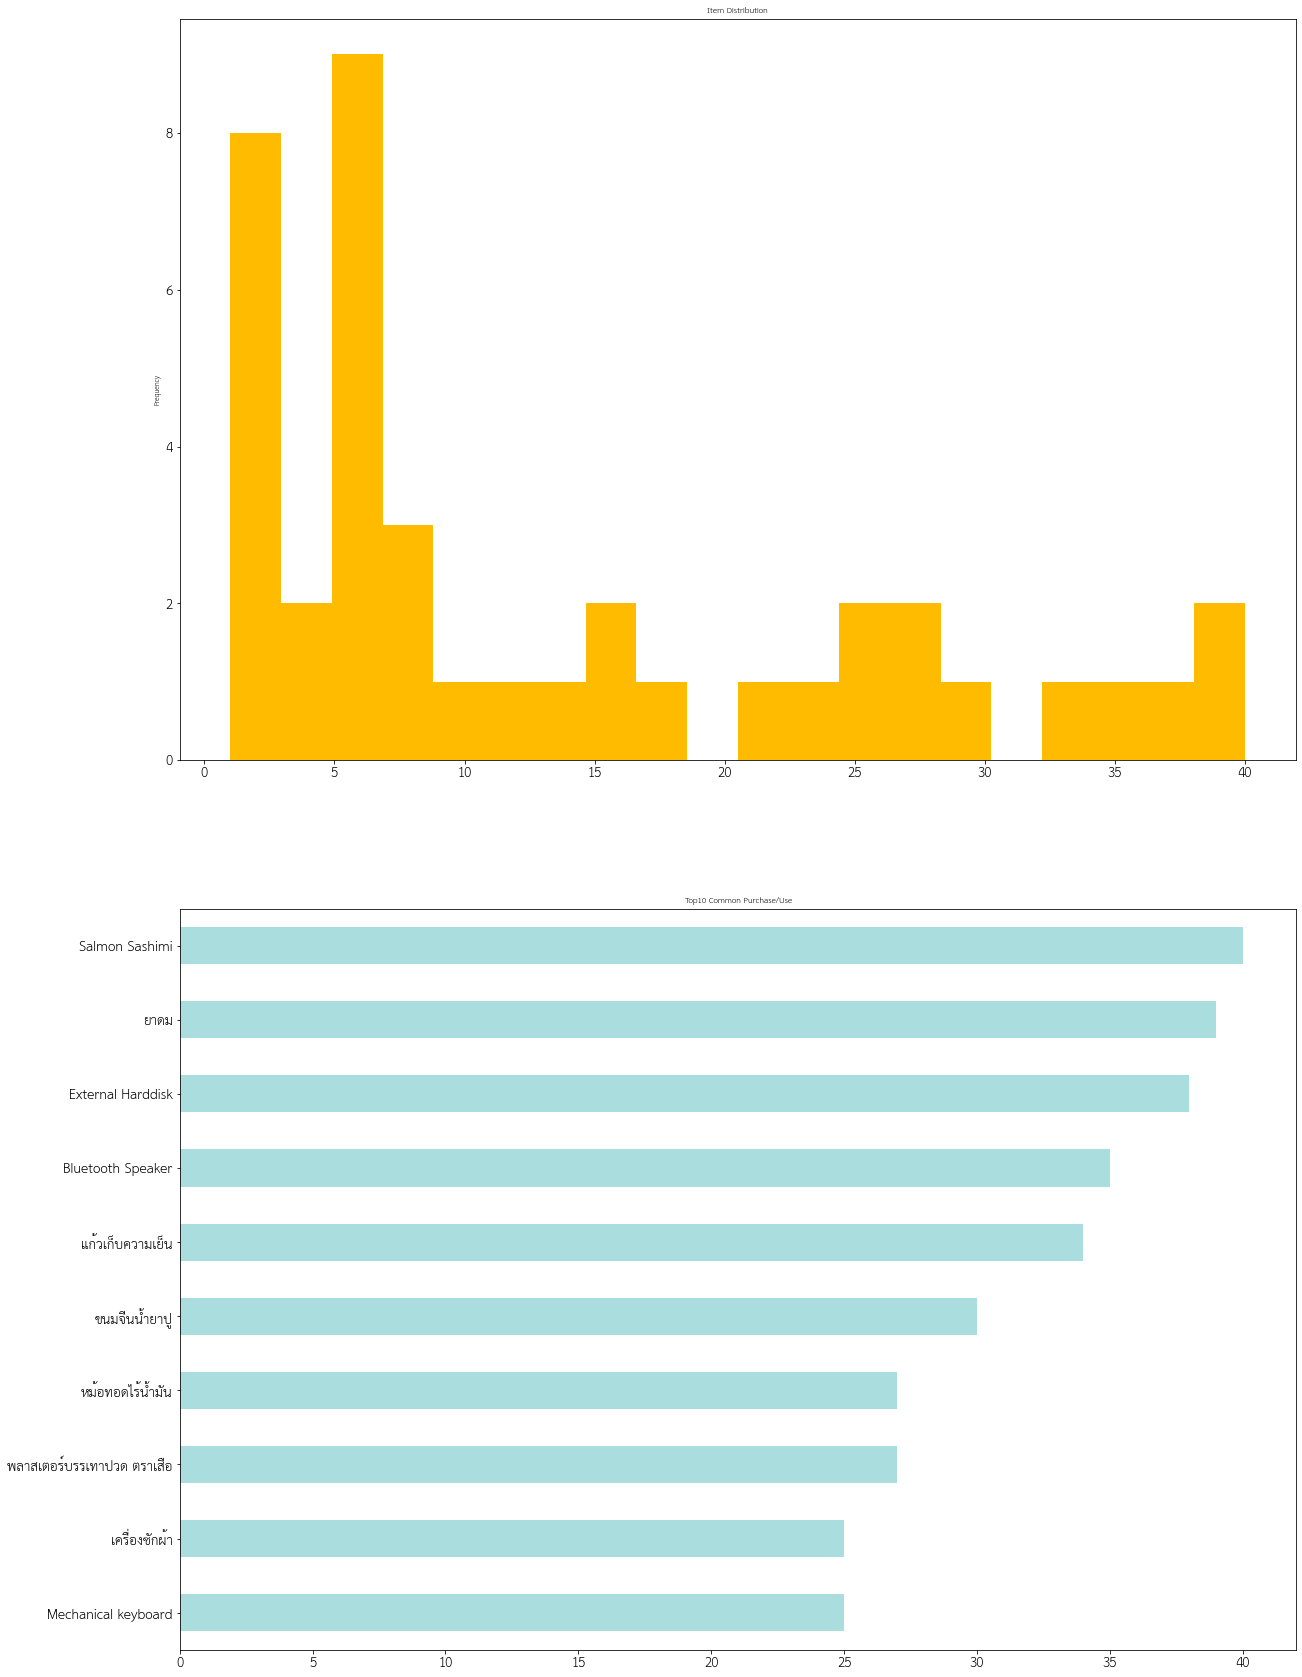

In [42]:
figure, axes = plt.subplots(2, 1,figsize=(20,30))
df_data.sum().plot.hist(bins= 20,color = '#ffbb00' ,ax=axes[0],title= 'Item Distribution')
df_data.sum().sort_values(ascending= True).tail(10).plot.barh(color = '#aadddd' ,ax=axes[1],title='Top10 Common Purchase/Use')
 
plt.show('Distribution') 

In [43]:
df.describe().T.sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Transaction_id,47.0,24.000000,13.711309,1.0,12.5,24.0,35.5,47.0
Salmon Sashimi,47.0,0.851064,0.359875,0.0,1.0,1.0,1.0,1.0
ยาดม,47.0,0.829787,0.379883,0.0,1.0,1.0,1.0,1.0
External Harddisk,47.0,0.808511,0.397727,0.0,1.0,1.0,1.0,1.0
Bluetooth Speaker,47.0,0.744681,0.440755,0.0,0.5,1.0,1.0,1.0
แก้วเก็บความเย็น,47.0,0.723404,0.452151,0.0,0.0,1.0,1.0,1.0
ขนมจีนน้ำยาปู,47.0,0.638298,0.485688,0.0,0.0,1.0,1.0,1.0
หม้อทอดไร้น้ํามัน,47.0,0.574468,0.499769,0.0,0.0,1.0,1.0,1.0
พลาสเตอร์บรรเทาปวด ตราเสือ,47.0,0.574468,0.499769,0.0,0.0,1.0,1.0,1.0
เครื่องซักผ้า,47.0,0.531915,0.504375,0.0,0.0,1.0,1.0,1.0


In [44]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)
item_item_matrix1 = item_item_matrix.iloc[2:-1,2:-1]

#ITEM-ITEM Collaborative filtering

In [45]:
for i in range(0,len(item_item_matrix1.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix1.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix1.iloc[i,j] =  1-cosine(df_data.iloc[:,i],df_data.iloc[:,j])

In [46]:
item_item_matrix1.head(10)

,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
เครื่องทำขนมปัง,1,0,0,0.433013,0,0,0,0.297044,0,0.654654,0.34641,0.19518,0,0,0,0,0.235702,0,0,0.433013,0.23094,0,0,0.258199,0,0,0.218218,0.182574,0,0.333333,0,0.210819,0.182574,0,0.348155,0.280976,0.333333,0.251976,0.27735,0.235702
Ergonomic Wrist Rest,0,1,0,0,0,0.5,0.196116,0.121268,0,0,0.282843,0.239046,0.707107,0,0.288675,0,0.288675,0,0.316228,0,0.282843,0.288675,0.293294,0.316228,0.342997,0,0,0.223607,0,0.272166,0,0,0.223607,0.316228,0.213201,0.229416,0.136083,0.154303,0.226455,0.288675
เครื่องอบผ้า,0,0,1,0.306186,0.288675,0.288675,0.339683,0.420084,0.288675,0,0.489898,0.345033,0,0,0.166667,0,0.166667,0,0,0.408248,0.326599,0.333333,0.338667,0.182574,0.297044,0,0.46291,0.645497,0.333333,0.392837,0,0.298142,0.322749,0.182574,0.246183,0.264906,0.392837,0.267261,0.392232,0.333333
เครื่องชงกาแฟแคปซูล,0.433013,0,0.306186,1,0.176777,0,0.27735,0.600245,0.176777,0.377964,0.5,0.591608,0,0,0.102062,0.25,0.51031,0.144338,0.111803,0.5,0.45,0.102062,0.362933,0.111803,0.30317,0,0.283473,0.316228,0.408248,0.529238,0,0.456435,0.553399,0.111803,0.376889,0.486664,0.529238,0.49099,0.640513,0.306186
เก้าอี้ LA-Z-Boy,0,0,0.288675,0.176777,1,0,0.392232,0.242536,0,0,0.282843,0.239046,0,0,0.288675,0,0.288675,0,0,0.176777,0,0,0.146647,0,0.171499,0,0.267261,0.223607,0.57735,0.272166,0,0,0.223607,0.316228,0.213201,0.229416,0.272166,0.154303,0.226455,0
เครื่องให้อาหารสัตว์อัตโนมัติ,0,0.5,0.288675,0,0,1,0.196116,0.242536,0.25,0,0.282843,0.239046,0.707107,0,0.288675,0,0.288675,0,0.316228,0.176777,0.282843,0.288675,0.293294,0.632456,0.342997,0,0.267261,0.447214,0,0.272166,0,0.129099,0.223607,0.316228,0.426401,0.229416,0.272166,0.308607,0.226455,0.288675
บัตตาเลี่ยน,0,0.196116,0.339683,0.27735,0.392232,0.196116,1,0.475651,0.392232,0,0.49923,0.562569,0,0,0.226455,0,0.113228,0.160128,0.124035,0.346688,0.44376,0.339683,0.575197,0.248069,0.470871,0.196116,0.419314,0.263117,0.452911,0.427008,0.27735,0.354459,0.394676,0.124035,0.418121,0.539906,0.480384,0.363137,0.488527,0.113228
แก้วเก็บความเย็น,0.297044,0.121268,0.420084,0.600245,0.242536,0.242536,0.475651,1,0.30317,0.324102,0.720294,0.724714,0.171499,0.171499,0.420084,0,0.35007,0.0990148,0.383482,0.64312,0.651695,0.35007,0.551291,0.230089,0.45754,0.121268,0.388922,0.542326,0.35007,0.726108,0.171499,0.688847,0.73214,0.306786,0.41367,0.778981,0.759113,0.598785,0.796391,0.280056
ลู่วิ่งออกกำลังกาย,0,0,0.288675,0.176777,0,0.25,0.392232,0.30317,1,0.267261,0.353553,0.358569,0,0,0.144338,0,0,0,0.158114,0.265165,0.353553,0.288675,0.513265,0.316228,0.342997,0,0.400892,0.33541,0.144338,0.340207,0,0.387298,0.391312,0.158114,0.213201,0.401478,0.340207,0.540062,0.452911,0.144338
Kindle,0.654654,0,0,0.377964,0,0,0,0.324102,0.267261,1,0.302372,0.319438,0,0.377964,0,0,0.154303,0,0,0.377964,0.302372,0.154303,0.235159,0.169031,0.18334,0,0.142857,0.119523,0,0.218218,0,0.276026,0.358569,0,0.341882,0.367884,0.363696,0.412393,0.423659,0.154303


#ITEM-ITEM Heat Map

In [47]:
corr = np.round(np.array(item_item_matrix1).astype(float),decimals=2)
corr

array([[1.  , 0.  , 0.  , ..., 0.25, 0.28, 0.24],
       [0.  , 1.  , 0.  , ..., 0.15, 0.23, 0.29],
       [0.  , 0.  , 1.  , ..., 0.27, 0.39, 0.33],
       ...,
       [0.25, 0.15, 0.27, ..., 1.  , 0.66, 0.36],
       [0.28, 0.23, 0.39, ..., 0.66, 1.  , 0.26],
       [0.24, 0.29, 0.33, ..., 0.36, 0.26, 1.  ]])

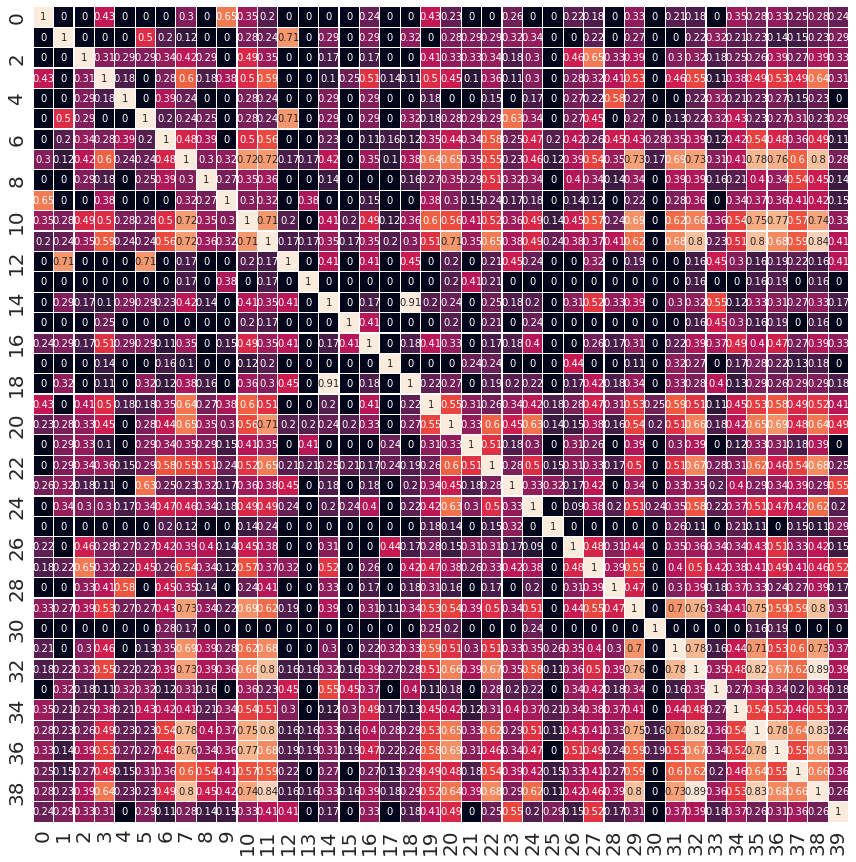

In [48]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(20,15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=0,vmax=.9, square=True, annot=True, cbar=False,  linewidths=.2)
    plt.show()

In [49]:
item_item_matrix1 = item_item_matrix1.dropna()

In [50]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [51]:
links['value'] = links.value.apply( lambda x :  round(x,3))
links.head(10)

,item,related item,value
0,เครื่องทำขนมปัง,เครื่องทำขนมปัง,1.000
1,เครื่องทำขนมปัง,Ergonomic Wrist Rest,0.000
2,เครื่องทำขนมปัง,เครื่องอบผ้า,0.000
3,เครื่องทำขนมปัง,เครื่องชงกาแฟแคปซูล,0.433
4,เครื่องทำขนมปัง,เก้าอี้ LA-Z-Boy,0.000
5,เครื่องทำขนมปัง,เครื่องให้อาหารสัตว์อัตโนมัติ,0.000
6,เครื่องทำขนมปัง,บัตตาเลี่ยน,0.000
7,เครื่องทำขนมปัง,แก้วเก็บความเย็น,0.297
8,เครื่องทำขนมปัง,ลู่วิ่งออกกำลังกาย,0.000
9,เครื่องทำขนมปัง,Kindle,0.655


In [52]:
links= links.loc[(links['item'] !=links['related item'])].sort_values('value',ascending = False)
links_filtered=links.loc[(links['item'] != links['related item'])& (links['value'] > 0.75)]
links_filtered.shape

(30, 3)

In [53]:
links_filtered.sort_values(by = ['value'], ascending = False).head(10)

,item,related item,value
734,น้ำพุแมว,ทรายแมว,0.913
578,ทรายแมว,น้ำพุแมว,0.913
1552,ยาดม,Salmon Sashimi,0.886
1318,Salmon Sashimi,ยาดม,0.886
478,Bluetooth Speaker,ยาดม,0.839
1531,ยาดม,Bluetooth Speaker,0.839
1555,ยาดม,External Harddisk,0.831
1438,External Harddisk,ยาดม,0.831
1432,External Harddisk,Salmon Sashimi,0.821
1315,Salmon Sashimi,External Harddisk,0.821


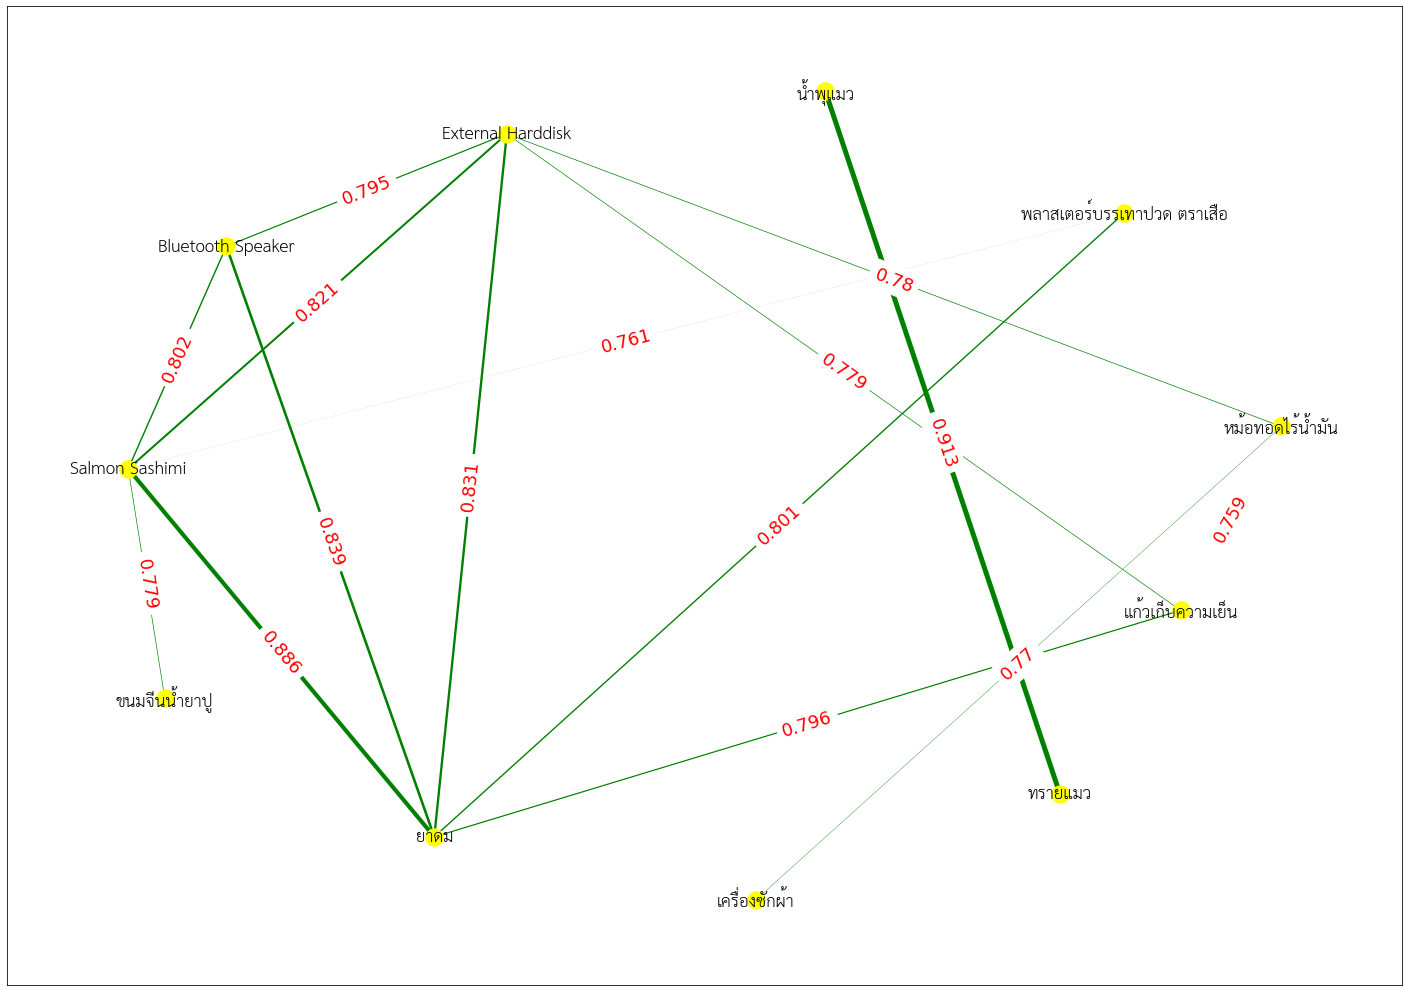

In [54]:
fig, ax = plt.subplots(figsize=(25,18))

GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])

weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}

pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = 'yellow') 
nx.draw_networkx_edges(GA, pos,edge_color='green',arrowsize=10, width=weight2, ax=ax ) 
edge_labels = nx.get_edge_attributes(GA, 'value')

nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red', font_size=18)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax, font_family='TH Sarabun Chula', font_size=25)
plt.show()

#USER-USER Collaborative filtering

In [55]:
df.columns

Index(['Timestamp', 'playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest',
       'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy',
       'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น',
       'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า', 'Bluetooth Speaker',
       'ห้องน้ำแมวอัตโนมัติ', 'PS5', 'ทรายแมว', 'ลำโพง pixel',
       'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น',
       'Mechanical keyboard', 'Nintendo switch', 'หนังสือ python',
       'gaming chair', 'Deskmat', 'Dew - ไฟโรเซ่', 'เทียนหอม jo malone',
       'กระติกน้ำ 2 ลิตร', 'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด',
       'Transaction_id'],
      dtype='object')

In [56]:
df_uu = df.drop(['Timestamp','Transaction_id'],axis=1)
df_uu

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
filtering_cosim = cosine_similarity(df_uu, df_uu)
print(filtering_cosim)

[[1.         0.4417261  0.63757671 ... 0.6260879  0.64972212 0.7407972 ]
 [0.4417261  1.         0.4330127  ... 0.37796447 0.58834841 0.3354102 ]
 [0.63757671 0.4330127  1.         ... 0.43643578 0.45291081 0.38729833]
 ...
 [0.6260879  0.37796447 0.43643578 ... 1.         0.44474959 0.59160798]
 [0.64972212 0.58834841 0.45291081 ... 0.44474959 1.         0.52623481]
 [0.7407972  0.3354102  0.38729833 ... 0.59160798 0.52623481 1.        ]]


#USER-USER Heat Map

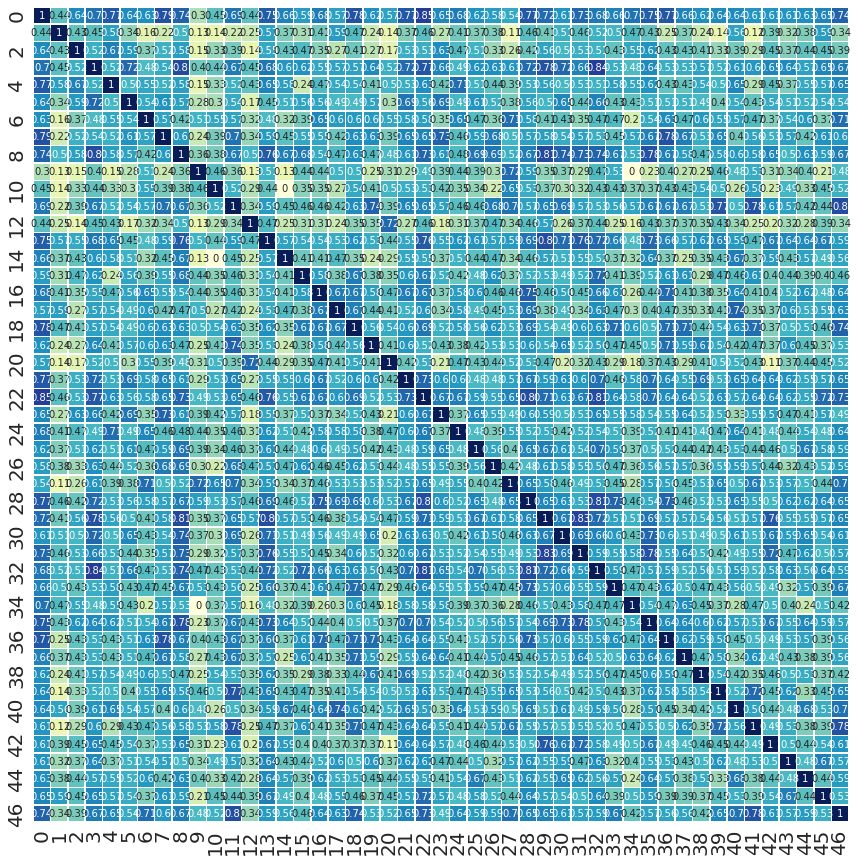

In [59]:
mask = np.zeros_like(filtering_cosim)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(20,15))
with sns.axes_style("white"):
    ax = sns.heatmap(filtering_cosim, mask=mask, vmin=0, vmax=1, square=True,  cmap="YlGnBu", annot=True, linewidths=.5, cbar=False)
    plt.show()

In [60]:
index_user = 0 # user001
most_sim_users = sorted(list(enumerate(filtering_cosim[index_user])), key=lambda x: x[1], reverse=True)
most_sim_users = most_sim_users[1:6]
sim_users = [x[0] for x in most_sim_users]
print(f'similarity user001 : {sim_users}')

similarity user001 : [22, 7, 18, 36, 21]


In [65]:
sim_users

[22, 7, 18, 36, 21]

In [66]:
df.head()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,Transaction_id
0,10/17/2021 17:29:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
1,10/17/2021 17:43:38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
2,10/17/2021 17:43:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
3,10/17/2021 17:43:46,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4
4,10/17/2021 17:43:49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5


In [61]:
list_users = []
for u in sim_users:
    list_users.append(df.iloc[u,0])
list_users

['10/17/2021 17:44:27',
 '10/17/2021 17:43:57',
 '10/17/2021 17:44:22',
 '10/17/2021 17:45:05',
 '10/17/2021 17:44:27']

In [62]:
df_sim_u = df_uu.iloc[sim_users, :]
df_sim_u

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [63]:
mean_score = pd.Series(df_sim_u.mean(axis=0))
mean_score = mean_score.sort_values(axis=0, ascending=False)
mean_score

ขนมจีนน้ำยาปู                    1.0
Salmon Sashimi                   1.0
ยาดม                             1.0
External Harddisk                1.0
พลาสเตอร์บรรเทาปวด ตราเสือ       1.0
Bluetooth Speaker                0.8
เครื่องซักผ้า                    0.8
แก้วเก็บความเย็น                 0.8
หนังสือ python                   0.6
หม้อทอดไร้น้ํามัน                0.4
Mechanical keyboard              0.4
Deskmat                          0.4
Nintendo switch                  0.4
ตุ๊กตา ty                        0.2
ลู่วิ่งออกกำลังกาย               0.2
น้ำพุแมว                         0.2
ทรายแมว                          0.2
Robot ดูดฝุ่น                    0.2
บัตตาเลี่ยน                      0.2
เทียนหอม jo malone               0.2
เครื่องชงกาแฟแคปซูล              0.2
airpods                          0.2
เก้าอี้ LA-Z-Boy                 0.0
เครื่องอบผ้า                     0.0
Ergonomic Wrist Rest             0.0
เครื่องทำขนมปัง                  0.0
Kindle                           0.0
เ

In [64]:
recom = list(mean_score.iloc[0:10].keys())
for i in recom:
    print("แนะนำ {} ให้กับ {}".format(i,list_users))

แนะนำ ขนมจีนน้ำยาปู ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ Salmon Sashimi ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ ยาดม ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ External Harddisk ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ พลาสเตอร์บรรเทาปวด ตราเสือ ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ Bluetooth Speaker ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/2021 17:44:27']
แนะนำ เครื่องซักผ้า ให้กับ ['10/17/2021 17:44:27', '10/17/2021 17:43:57', '10/17/2021 17:44:22', '10/17/2021 17:45:05', '10/17/20